# Lead Score - Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

### Goals and Objectives

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## 1. Import Libraries

In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)


## 2. Reading Dataset and Understanding Data

In [6]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')
df

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website           NaN   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9235                  2.67        Email Marked Spam  Saudi Arabia   
9236                  2.00                 SMS Sent         India   
9237                  2.00                 SMS Sent         India   
9238                  3.00                 SMS Sent         India   
9239                  3.00                 SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
0                        Select                             Select   
1                        Select                             Select   
2       Business Administration                             Select   
3         Media and Advertising                      Word Of Mouth   
4                        Select                              Other   
...                         ...                                ...   
9235     IT Projects Management                             Select   
9236      Media and Advertising                             Select   
9237    Business Administration                             Select   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                             Select   

     What is your current occu

In [7]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [8]:
#To get an idea of the numeric values
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [9]:
# get entire information that needs to be inspected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Observsation:
As it seems that there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## 3. Cleaning Data

In [12]:
# Converting all the values to lower case
df1 = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [13]:
# Finding column names in which 'Select' level is available:-

cols=list(df1.columns)
for i in cols:
    if 'select' in df1[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


##### Observation
We found that column 'Specialization','How did you hear about X Education','Lead Profile' and 'City' having 'Select' level.Which means the customer had not selected option while filling form.So it is better to impute will 'Null' values.

In [15]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df1 = df1.replace('select',np.NaN)

In [16]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As it is  clearly seen there are a lot of columns which have high number of missing values. Clearly, these columns are not useful.Let's eliminate the columns having greater than 40% missing values as they are of no use to us.

In [18]:
col_missing_percent=pd.DataFrame(round(100*(df1.isnull().sum()/len(df1.index)), 2))
high_miss_col=[]
col_missing_percent=col_missing_percent.reset_index()
for i in range(len(col_missing_percent)):
    if col_missing_percent.iloc[i,1] > 40 :
     # print(col_missing_percent.iloc[i,0])
       high_miss_col.append(col_missing_percent.iloc[i,0])
print(high_miss_col)

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [19]:
# Removing all the columns that are no required and have 35% null values
df1=df1.drop(high_miss_col, axis=1)

In [20]:
df1.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

  Country           Specialization What is your current occupation  \
0     NaN                      NaN                      unemployed   
1   india                      NaN                      unemployed   
2   india  business administration                         student   
3   india    media and advertising                      unemployed   
4   india                      NaN                      unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       better career prospects     no       no   
1                       better career prospects     no       no   
2                       better career prospects     no       no   
3                       better career prospects     no       no   
4                       better career prospects     no       no   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                no                 no        no                    no   
1                no                 no        no                    no   
2                no                 no        no                    no   
3                no                 no        no                    no   
4                no                 no        no                    no   

  Through Recommendations Receive More Updates About Our Courses  \
0                      no                                     no   
1                      no                                     no   
2                      no                                     no   
3                      no                                     no   
4                      no                                     no   

                                  Tags Update me on Supply Chain Content  \
0          interested in other courses                                no   
1                              ringing                                no   
2  will revert after reading the email                                no   
3                              ringing                                no   
4  will revert after reading the email                                no   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        no     NaN                                       no   
1                        no     NaN                                       no   
2                        no  mumbai                                       no   
3                        no  mumbai                                       no   
4                        no  mumbai                                       no   

  A free copy of 

#### Observation:
Clearly the variables 'Prospect ID' and 'Lead Number' won't be of any use in the analysis, so it's best that we drop these two variables.

In [22]:
df1.drop(['Prospect ID','Lead Number'], inplace=True, axis=1)

In [23]:
# Checking if there are columns with one unique value since it won't affect our analysis
col_nunique_values=pd.DataFrame(df1.nunique())
uniq_col=[]
col_nunique_values=col_nunique_values.reset_index()
for i in range(len(col_nunique_values)):
    if col_nunique_values.iloc[i,1] == 1 :
     # print(col_missing_percent.iloc[i,0])
       uniq_col.append(col_nunique_values.iloc[i,0])
print(uniq_col)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [24]:
# Dropping unique valued columns
df2= df1.drop(uniq_col,axis=1)
df2.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [25]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Observation:
There are seven columns that still have high null values: country, Specialization,What is your current occupation, What matters most to you in choosing a course, Tags and City. We will look at them individually to see what can be done

In [27]:
#df2['Specialization'] = df2['Specialization'].fillna('not provided') 
#df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
#df2['Country'] = df2['Country'].fillna('not provided')
#df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
#df2.info()

In [28]:
# Check Country
df2['Country'].value_counts()

Country
india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
nigeria                    4
germany                    4
canada                     4
sweden                     3
italy                      2
belgium                    2
ghana                      2
philippines                2
netherlands                2
china                      2
asia/pacific region        2
bangladesh                 2
uganda                     2
russia                     1
sri lanka                  1
tanzania                   1
kenya                      1
malaysia                   1
liberia                    1
denmar

##### Observation: 
The distribution of the data is very heavily skewed, with India + null values = 97% of the total. It is safe to drop this column.

In [30]:
df2.drop(['Country'], inplace=True, axis=1)

In [31]:
# Check Specialization
df2['Specialization'].value_counts()

Specialization
finance management                   976
human resource management            848
marketing management                 838
operations management                503
business administration              403
it projects management               366
supply chain management              349
banking, investment and insurance    338
media and advertising                203
travel and tourism                   203
international business               178
healthcare management                159
hospitality management               114
e-commerce                           112
retail management                    100
rural and agribusiness                73
e-business                            57
services excellence                   40
Name: count, dtype: int64

Observation:

The column 'Specialization' has a lot of null values. We choose not to drop it as it might turn out to be significant in the analysis. So let's just fill the null rows with 'not_provided' value

In [33]:
df2['Specialization'] = df2['Specialization'].fillna('not_provided')

In [34]:
#Check 'What is your current occupation'
df2['What is your current occupation'].value_counts()

What is your current occupation
unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: count, dtype: int64

#### Observation:
We see that 'Unemployed' count is highest but we will impute missing values with 'other' considering we do not know current occupation of lead.So we will create a separate category called 'other'.

In [36]:
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('other')

In [37]:
# Check 'What matters most to you in choosing a course'
df2['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
better career prospects      6528
flexibility & convenience       2
other                           1
Name: count, dtype: int64

##### Observation: 
The distribution of the data is very heavily skewed, with "Better Career Prospects" + null value ~99%. It is safe to drop this column.

In [39]:
df2.drop(['What matters most to you in choosing a course'], inplace=True, axis=1)

In [40]:
# Check 'Tags'
df2['Tags'].value_counts()

Tags
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with eins                                     12
lost to o

#### Observation:
Tags are created by the sales team after contacting the leads. It has high missing rows so we can drop these columns.


In [42]:
df2.drop(['Tags'], inplace=True, axis=1)

In [43]:
# Check 'City'
df2['City'].value_counts()

City
mumbai                         3222
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: count, dtype: int64

#### Observation:
- City column having ~39% missing values and if we will impute mode or most frequent value for missing value then our data will be some what biased.So better to drop it.

In [45]:
df2.drop(['City'], inplace=True, axis=1)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

#### Observation: 
- Some low missing values such as: Lead Source, Last Activity --> we can replace by mode (because they are categoricial variables)
-  Some low missing values such as: TotalVisits, Page Views Per Visit --> we can replace by median (because they are numerical variables)

In [48]:
#Check 'Lead Source':
df2['Lead Source'].value_counts()

Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
live chat               2
social media            2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64

Observation

From above data we can see that there are two 'Google' and 'google' ,so better to replace 'google' with 'Google'.


In [50]:
# Replace 'google' with 'Google' :-

df2['Lead Source'] = df2['Lead Source'].replace('google','Google')
df2['Lead Source'] = df2['Lead Source'].fillna(df2['Lead Source'].mode()[0])

In [51]:
# Replace missing value = mode value for Last Activity
df2['Last Activity']= df2['Last Activity'].fillna(df2['Last Activity'].mode()[0])

In [52]:
# Replace missing value = median value for TotalVisits,Page Views Per Visit 

df2['TotalVisits'] = df2['TotalVisits'].fillna(df2['TotalVisits'].median())
df2['Page Views Per Visit'] = df2['Page Views Per Visit'].fillna(df2['Page Views Per Visit'].median())

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

#### Observation:
Now all missing data are treated. We can process to EDA part.

## 4. EDA

### 4.1 Univariate Analysis

#### Categorical Variables

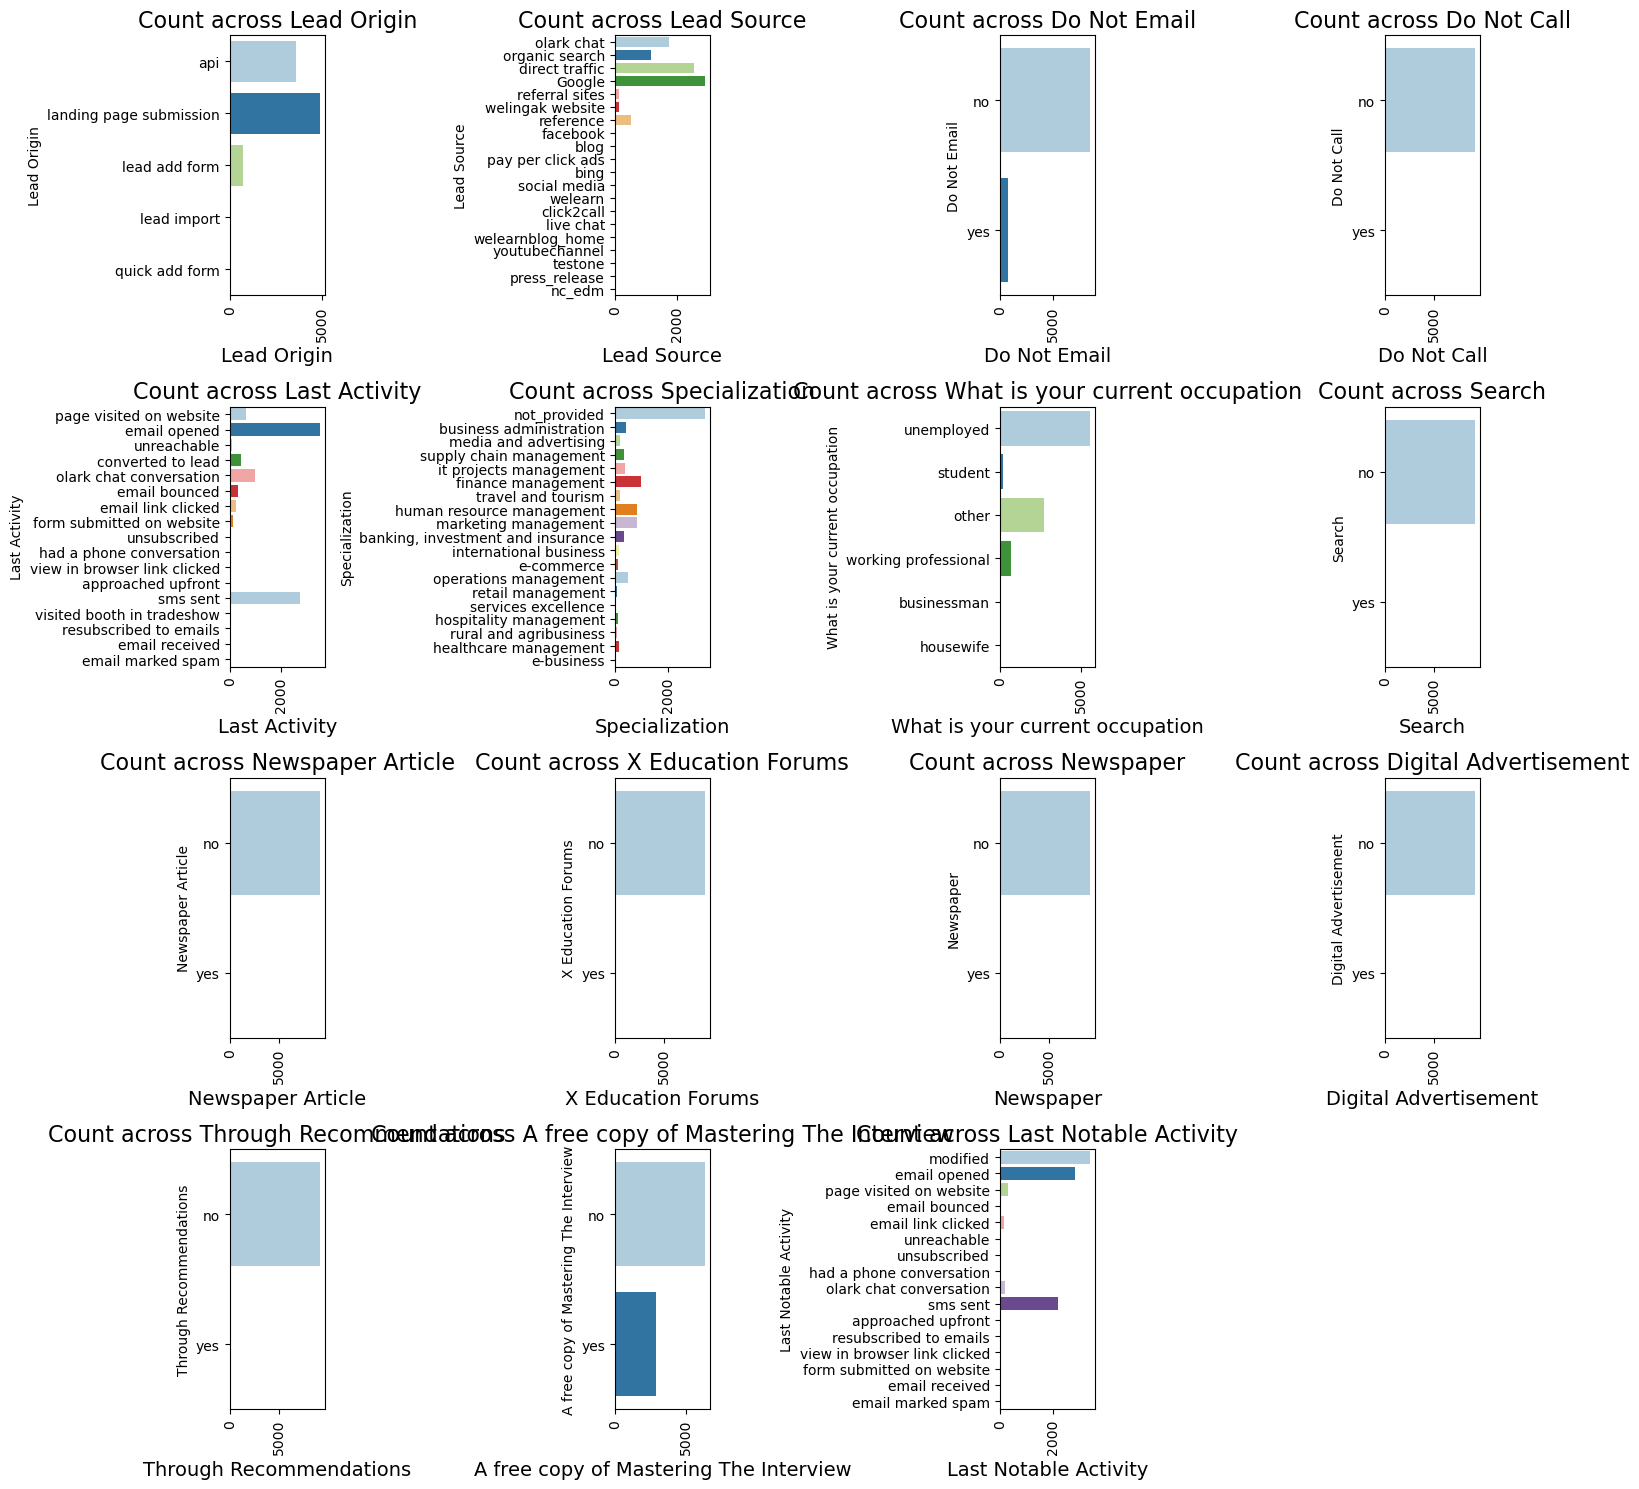

In [58]:
def countplot(x, fig):
    plt.subplot(4,4, fig)
    sns.countplot(df2[x],palette="Paired")
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,15))

col_list = df2.select_dtypes(include=['object']).columns.to_list()

for i in range(len(col_list)):
    countplot(col_list[i],i+1)

plt.tight_layout()

#### Observation:
- There were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.


In [60]:
# Drop single value columns
df2.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'],inplace=True, axis=1)


#### Numerical Variables

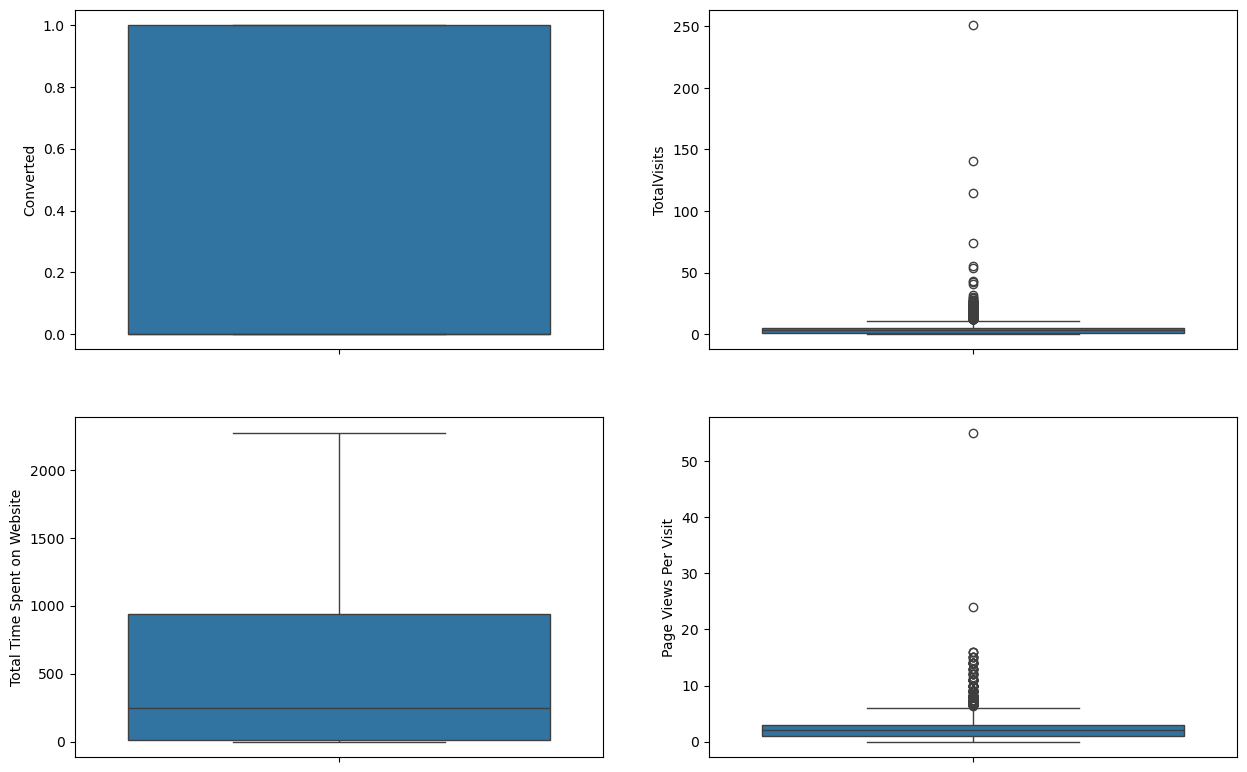

In [62]:
# Plotting box plots to visualize data distribution of all numerical variables
col_num = df2.select_dtypes(include=['float64','int64']).columns.to_list()

plt.figure(figsize=(15,15))

i = 1
for col in col_num:
    plt.subplot(3,2,i)
    sns.boxplot(y=col, data=df2)
    i+=1

Observation:

There are some outliers with 'TotalVisits' and 'Page Views Per Visit' so we will remove the outliers

In [64]:
# Remove outlier for 'TotalVistis' and 'Page View Per Visit'
# Treating outliers by capping upper range to 0.99:
df2=df2[(df2['TotalVisits']<=df2['TotalVisits'].quantile(0.99) ) & (df2['Page Views Per Visit']<=df2['Page Views Per Visit'].quantile(0.899))]


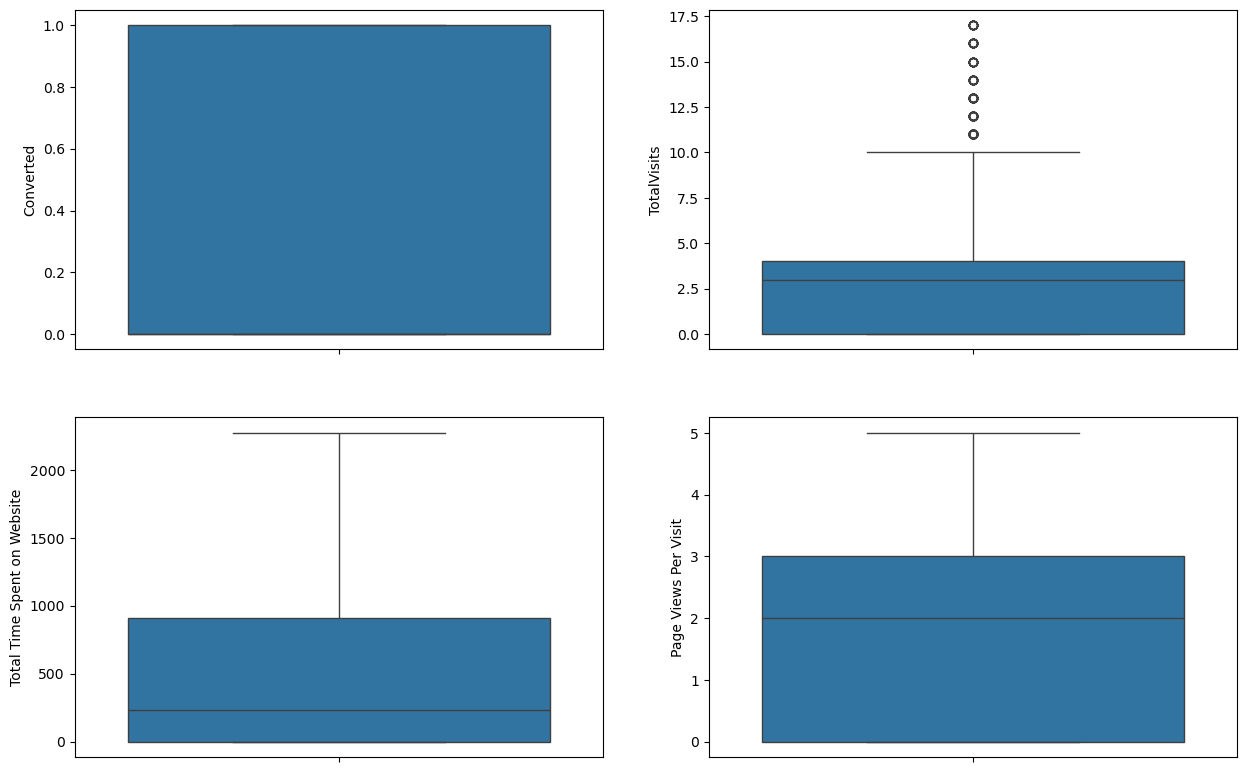

In [65]:
# Plotting box plots again to visualize data distribution of all numerical variables after removing outliers
col_num = df2.select_dtypes(include=['float64','int64']).columns.to_list()

plt.figure(figsize=(15,15))

i = 1
for col in col_num:
    plt.subplot(3,2,i)
    sns.boxplot(y=col, data=df2)
    i+=1

### 4.2 Bivariate Analysis

#### Check Categorical variables and target variable

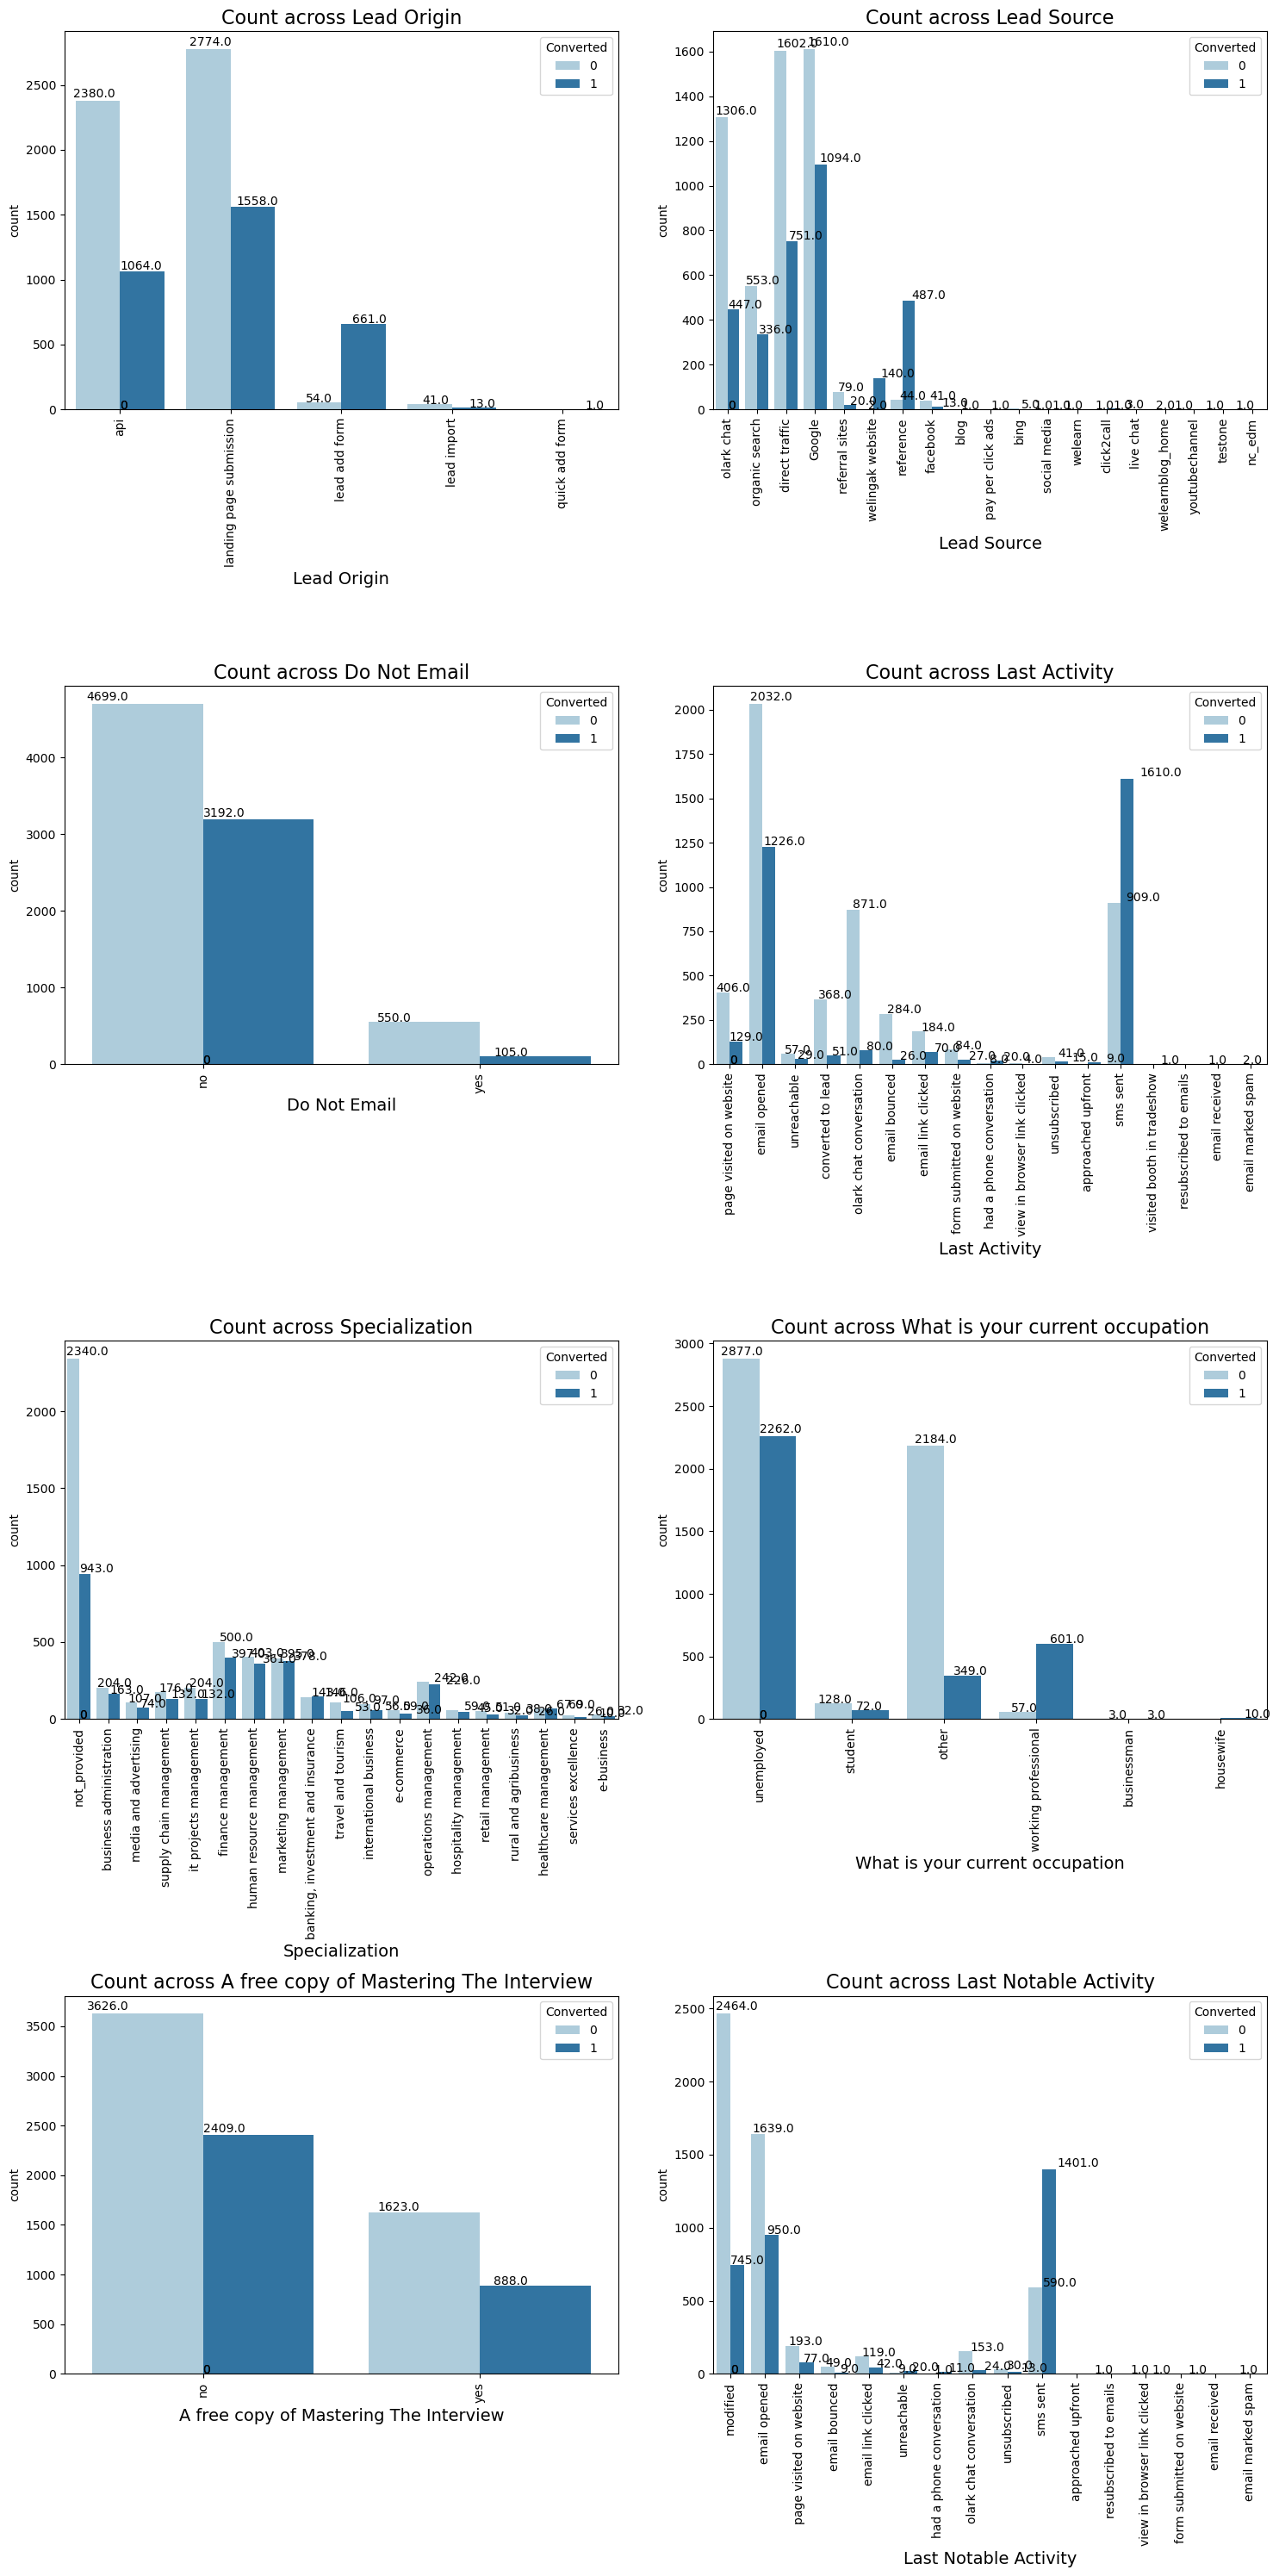

In [68]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    ax=sns.countplot(x=df2[x],hue=df2['Converted'],palette="Paired")
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.05 , p.get_height() * 1.01))

plt.figure(figsize=(15,30))

col_list = df2.select_dtypes(include=['object']).columns.to_list()

for i in range(len(col_list)):
    countplot(col_list[i],i+1)

plt.tight_layout()

#### Observation

##### From above plots we can observe and calculate that :
- Lead Origin:
    + Conversion rate for 'API' is ~ 31% and for 'Landing Page Submission' is ~36%.
    + For 'Lead Add Form' number of conversion is more than unsuccessful conversion.
    + Count of 'Lead Import' is lesser.
- Lead Source:
    + Google and Direct traffic generates maximum number of leads.
    + Conversion rate of 'Reference' and 'Welingak Website' leads is high.
- Do not email:
    + People who haven't opted for mail option are becoming more leads (68%).
- Last activity & Last Notable Activity:
    + 'SMS Sent' has highest conversion rate.
    + Highest last activity of leads is 'Email Opened' .
- What is your current occupation:
    + 'Unemployed' leads are generationg more number of leads and having ~45% conversion rate.
    + Conversion rate is higher for 'Working Professionals' .
- Specialization:
    + 'Management' specialization altogether having more number of leads generating.And not_provided category is also generating more number of leads.
  
##### Recommendation
- Lead Origin:
    + To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form
- Lead Source:
    + To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.
  

#### Check Numerical variables and target variable

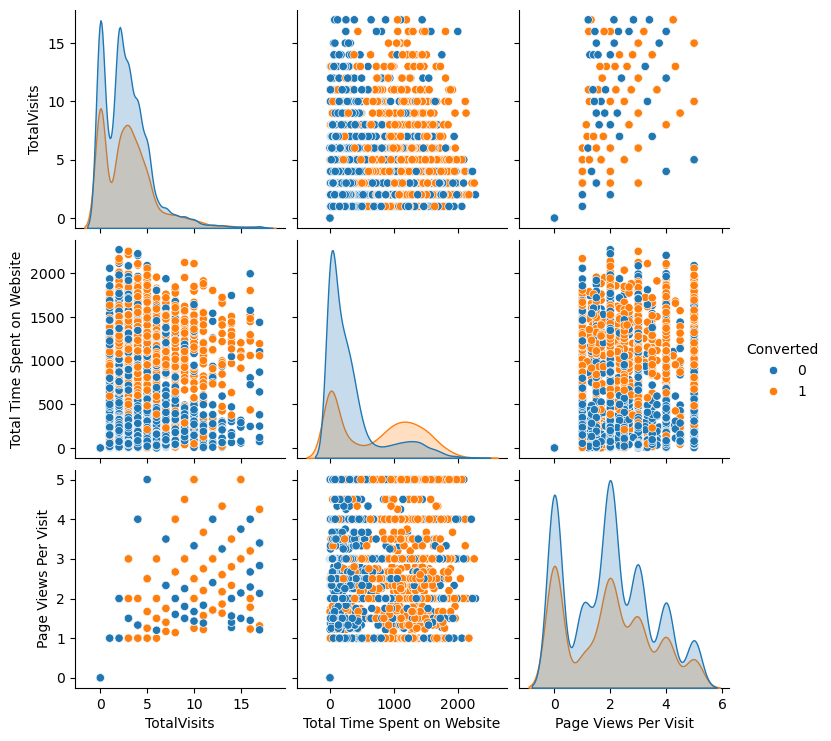

In [71]:
# Check pairplot for continuous variables
sns.pairplot(df2,diag_kind='kde',hue='Converted')
plt.show()

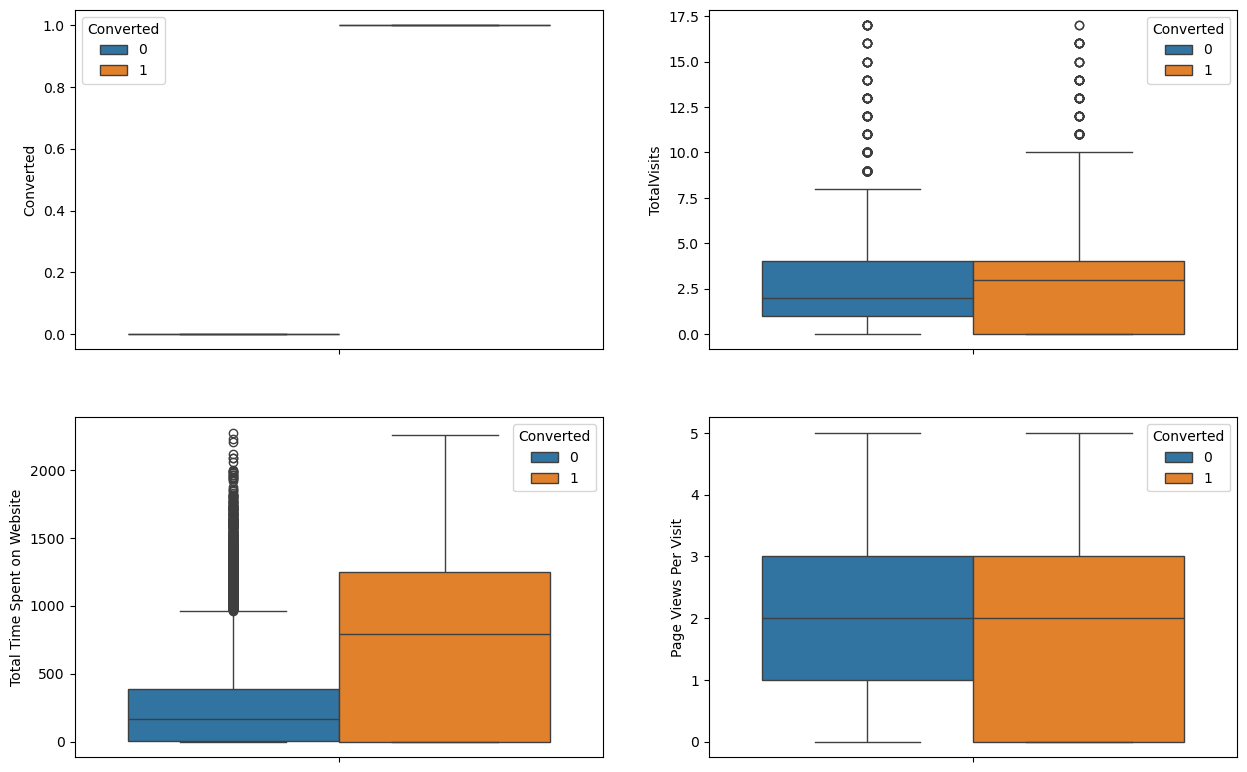

In [72]:
# Draw box plots for indepent variables with continuous values
#col1 = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
col_num = df2.select_dtypes(include=['float64','int64']).columns.to_list()

plt.figure(figsize=(15,15))

i = 1
for col in col_num:
    plt.subplot(3,2,i)
    sns.boxplot(y=col, data=df2,hue='Converted')
    i+=1

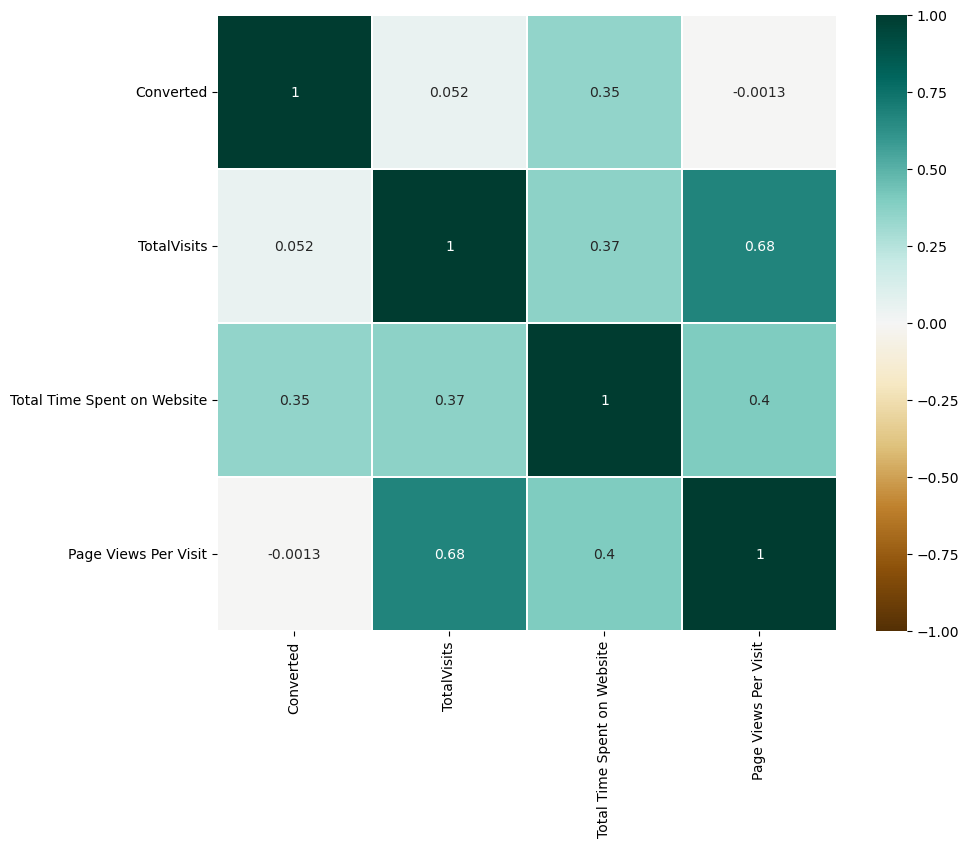

In [73]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df2[col_num].corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

#### Observation

- 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .68
- 'Total Time Spent on Website' has correlation of 0.35 with target variable 'Converted'.

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8546 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8546 non-null   object 
 1   Lead Source                             8546 non-null   object 
 2   Do Not Email                            8546 non-null   object 
 3   Converted                               8546 non-null   int64  
 4   TotalVisits                             8546 non-null   float64
 5   Total Time Spent on Website             8546 non-null   int64  
 6   Page Views Per Visit                    8546 non-null   float64
 7   Last Activity                           8546 non-null   object 
 8   Specialization                          8546 non-null   object 
 9   What is your current occupation         8546 non-null   object 
 10  A free copy of Mastering The Interview  8546 non-null   object 
 

In [76]:

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df2[col_num].describe(percentiles=[.25, .5, .75, .90, .95, .99])

Converted  TotalVisits  Total Time Spent on Website  \
count  8546.000000  8546.000000                  8546.000000   
mean      0.385795     2.860754                   475.620758   
std       0.486811     2.687515                   545.986155   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                     0.000000   
50%       0.000000     3.000000                   236.000000   
75%       1.000000     4.000000                   912.000000   
90%       1.000000     6.000000                  1371.000000   
95%       1.000000     8.000000                  1552.000000   
99%       1.000000    13.000000                  1831.650000   
max       1.000000    17.000000                  2272.000000   

       Page Views Per Visit  
count           8546.000000  
mean               1.973966  
std                1.518466  
min                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
90%                4.000000  
95%                5.000000  
99%                5.000000  
max                5.000000

In [77]:
df2.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      api      olark chat           no          0   
1                      api  organic search           no          0   
2  landing page submission  direct traffic           no          1   
3  landing page submission  direct traffic           no          0   
4  landing page submission          Google           no          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  page visited on website             not_provided   
1             email opened             not_provided   
2             email opened  business administration   
3              unreachable    media and advertising   
4        converted to lead             not_provided   

  What is your current occupation A free copy of Mastering The Interview  \
0                      unemployed                                     no   
1                      unemployed                                     no   
2                         student                                    yes   
3                      unemployed                                     no   
4                      unemployed                                     no   

  Last Notable Activity  
0              modified  
1          email opened  
2          email opened  
3              modified  
4              modified

## 5. Data Preparation for Model Training

### 5.1. Create Dummy Variables

In [80]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df2[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']],dtype='int', drop_first=True)

# Adding the results to the master dataframe
df_final = pd.concat([df2, dummy1], axis=1)

In [81]:
# We have created dummies for the below variables, so we can drop them
df_final = df_final.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity'], axis=1)


In [82]:
df_final.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Lead Origin_quick add form  Lead Source_bing  \
0                        0                           0                 0   
1                        0                           0                 0   
2                        0                           0                 0   
3                        0                           0                 0   
4                        0                           0                 0   

   Lead Source_blog  Lead Source_click2call  Lead Source_direct traffic  \
0                 0                       0                           0   
1                 0                       0                           0   
2                 0                       0                           1   
3                 0                       0                           1   
4                 0                       0                           0   

   Lead Source_facebook  Lead Source_live chat  Lead Source_nc_edm  \
0                     0                      0                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   0   
4                     0                      0                   0   

   Lead Source_olark chat  Lead Source_organic search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_pay per click ads  Lead Source_reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_referral sites  Lead Source_social media  Lead Source_testone  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_welearn  Lead Source_welearnblog_home  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   Lead Source_welingak website  Lead Source_youtubechannel  Do Not Email_yes  \
0                             0                           0                 0   
1                             0                           0                 0   
2                  

### 5.2. Test-Train Split

In [84]:
# Putting feature variable to X
X = df_final.drop(['Converted'], axis=1)
y = df_final['Converted']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### 5.3 Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()


TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3595    -1.074584                    -0.871224             -1.301299   
1944    -1.074584                    -0.871224             -1.301299   
8515     0.057799                     0.982695              0.669782   
336      0.057799                    -0.055206              0.669782   
496      0.812722                    -0.627335              1.983836   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
3595                                    0                          0   
1944                                    0                          0   
8515                                    1                          0   
336                                     0                          0   
496                                     0                          0   

      Lead Origin_lead import  Lead Origin_quick add form  Lead Source_bing  \
3595                        0                           0                 0   
1944                        0                           0                 0   
8515                        0                           0                 0   
336                         0                           0                 0   
496                         0                           0                 0   

      Lead Source_blog  Lead Source_click2call  Lead Source_direct traffic  \
3595                 0                       0                           0   
1944                 0                       0                           0   
8515                 0                       0                           1   
336                  0                       0                           0   
496                  0                       0                           0   

      Lead Source_facebook  Lead Source_live chat  Lead Source_nc_edm  \
3595                     0                      0                   0   
1944                     0                      0                   0   
8515                     0                      0                   0   
336                      0                      0                   0   
496                      0                      0                   0   

      Lead Source_olark chat  Lead Source_organic search  \
3595                       1                           0   
1944                       1                           0   
8515                       0                           0   
336                        0                           0   
496                        0                           0   

      Lead Source_pay per click ads  Lead Source_reference  \
3595                              0                      0   
1944                              0                      0   
8515                              0                      0   
336                               0                      0   
496                               0                      0   

      Lead Source_referral sites  Lead Source_social media  \
3595                           0                         0   
1944                           0                         0   
8515                           0                         0   
336                            0                         0   
496                            1                         0   

      Lead Source_testone  Lead Source_welearn  Lead Source_welearnblog_home  \
3595                    0                    0                             0   
1944                    0                    0                             0   
8515                    0                    0                             0   
336                     0                    0                             0   
496                     0                    0                             0   

      Lead Source_welingak website  Lead Source_youtubechannel  \
3595                             0                           0   
1944                             0   

In [87]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  5.982000e+03                 5.982000e+03          5.982000e+03
mean  -2.731943e-17                -3.682184e-17          4.988765e-17
std    1.000084e+00                 1.000084e+00          1.000084e+00
min   -1.074584e+00                -8.712238e-01         -1.301299e+00
25%   -1.074584e+00                -8.712238e-01         -1.301299e+00
50%    5.779914e-02                -4.384594e-01          1.275502e-02
75%    4.352603e-01                 7.938189e-01          6.697821e-01
max    5.342256e+00                 3.295050e+00          1.983836e+00

In [88]:
### Checking the Churn Rate
convert = (sum(df_final['Converted'])/len(df_final['Converted'].index))*100
convert

38.5794523753803

We have almost 38.6% churn rate

### 5.4 Looking at Correlations

In [91]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

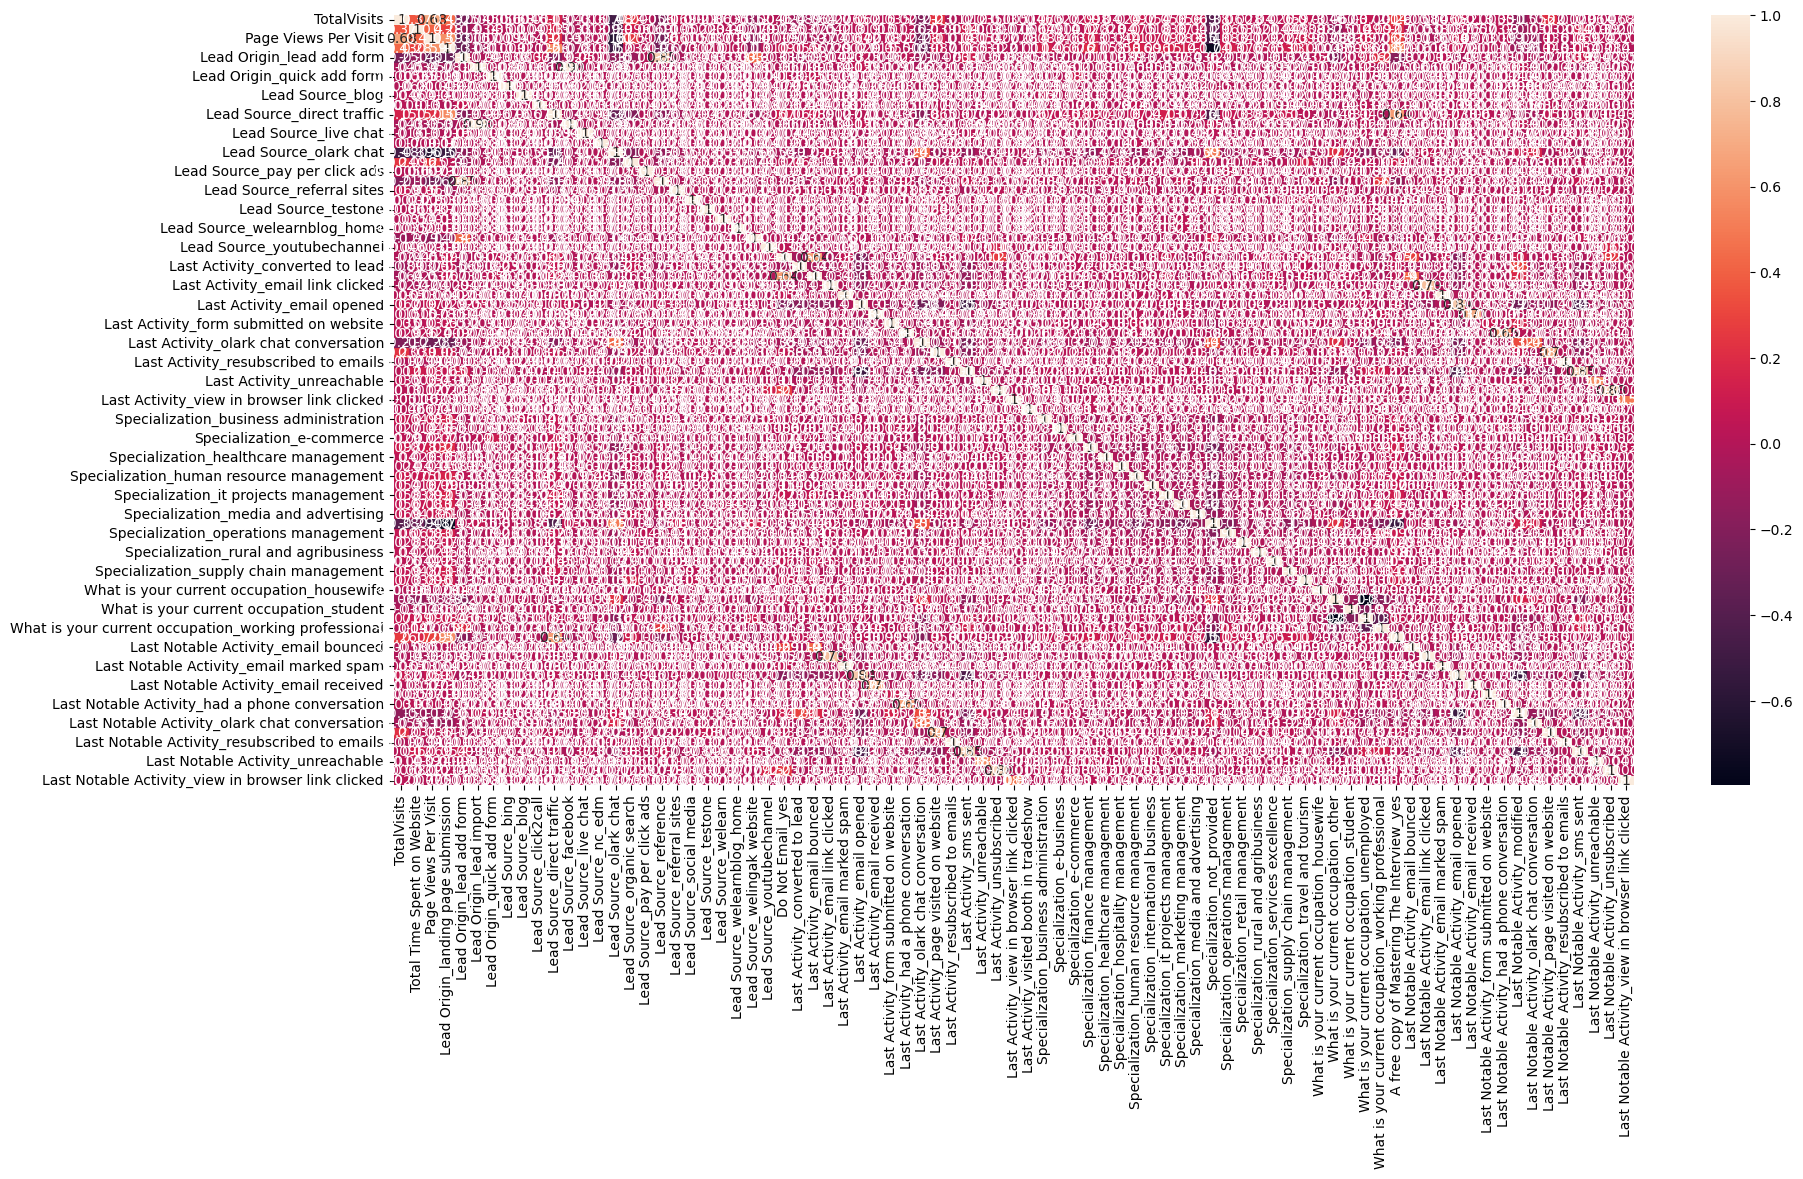

In [92]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

<font color= green>___Since there are a lot of variables.It is difficult to drop variable. We'll do it after RFE___</font>

## 6.Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

### 6.1. Using RFE and Automated approach
#### Use RFE to eliminate some column

In [96]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [97]:
# Import RFE
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [98]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 30),
 ('Lead Origin_quick add form', False, 43),
 ('Lead Source_bing', False, 44),
 ('Lead Source_blog', False, 51),
 ('Lead Source_click2call', False, 19),
 ('Lead Source_direct traffic', False, 22),
 ('Lead Source_facebook', False, 41),
 ('Lead Source_live chat', False, 42),
 ('Lead Source_nc_edm', False, 8),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 28),
 ('Lead Source_pay per click ads', False, 49),
 ('Lead Source_reference', False, 14),
 ('Lead Source_referral sites', False, 40),
 ('Lead Source_social media', False, 18),
 ('Lead Source_testone', False, 66),
 ('Lead Source_welearn', False, 32),
 ('Lead Source_welearnblog_home', False, 63),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel',

In [99]:
# Put all the columns selected by RFE in the variable 'col'
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_landing page submission',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'Specialization_not_provided',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified', 'Last Notable Activity_unreachable'],
      dtype='object')

<font color= green>___All the variables selected by RFE, next statistics part (p-values and the VIFs).___</font>

In [101]:
# Selecting columns selected by RFE
X_train = X_train[rfe_col]

### 6.2 Build model using manual feature elimination


#### Model 1

In [104]:
# Importing statsmodels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5982
Model:                            GLM   Df Residuals:                     5966
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2367.6
Date:                Thu, 17 Oct 2024   Deviance:                       4735.3
Time:                        13:42:24   Pearson chi2:                 6.23e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4175
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1239      0.136     -0.910      0.363      -0.391       0.143
Total Time Spent on Website                              1.0902      0.043     25.600      0.000       1.007       1.174
Lead Origin_landing page submission                     -0.9247      0.137     -6.756      0.000      -1.193      -0.656
Lead Origin_lead add form                                3.0726      0.214     14.340      0.000       2.653       3.493
Lead Source_olark chat                                   1.1861      0.128      9.233      0.000       0.934       1.438
Lead Source_welingak website                             2.9050      1.029      2.823      0.005       0.888       4.922
Do Not Email_yes                                        -1.3397      0.175     -7.645      0.000      -1.683      -0.996
Last Activity_olark chat conversation                   -0.8463      0.172     -4.922      0.000      -1.183      -0.509
Last Activity_sms sent                                   1.2767      0.079     16.060      0.000       1.121       1.432
Specialization_not_provided                             -0.8269      0.131     -6.333      0.000      -1.083      -0.571
What is your current occupation_housewife               22.5806   1.35e+04      0.002      0.999   -2.65e+04    2.65e+04
What is your current occupation_other                   -1.1974      0.093    -12.931      0.000      -1.379      -1.016
What is your current occupation_working professional     2.3762      0.200     11.881      0.000       1.984       2.768
Last Notable Activity_had a phone conversation           2.8033      1.215      2.308      0.021       0.422       5.184
Last Notable Activity_modified                          -0.7365      0.084     -8.716      0.000      -0.902      -0.571
Last Notable Activity_unreachable                        2.4717      0.669      3.696      0.000       1.161       3.783
========================================================================================================================
"""

 There are quite a variable which has a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

##### Checking `VIF`

In [107]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                            Specialization_not_provided  2.41
3                                 Lead Source_olark chat  2.14
1                    Lead Origin_landing page submission  1.85
13                        Last Notable Activity_modified  1.82
10                 What is your current occupation_other  1.65
6                  Last Activity_olark chat conversation  1.58
7                                 Last Activity_sms sent  1.52
2                              Lead Origin_lead add form  1.51
4                           Lead Source_welingak website  1.28
0                            Total Time Spent on Website  1.25
11  What is your current occupation_working professional  1.18
5                                       Do Not Email_yes  1.13
9              What is your current occupation_housewife  1.01
14                     Last Notable Activity_unreachable  1.01
12        Last Notable Activity_had a phone conversation  1.00

<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation_housewife'___</font>

In [109]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

#### Model 2

In [111]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5982
Model:                            GLM   Df Residuals:                     5967
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2373.0
Date:                Thu, 17 Oct 2024   Deviance:                       4746.1
Time:                        13:42:24   Pearson chi2:                 6.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4164
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1146      0.136     -0.843      0.399      -0.381       0.152
Total Time Spent on Website                              1.0893      0.043     25.610      0.000       1.006       1.173
Lead Origin_landing page submission                     -0.9239      0.137     -6.760      0.000      -1.192      -0.656
Lead Origin_lead add form                                3.0862      0.214     14.419      0.000       2.667       3.506
Lead Source_olark chat                                   1.1847      0.128      9.226      0.000       0.933       1.436
Lead Source_welingak website                             2.8908      1.029      2.809      0.005       0.874       4.908
Do Not Email_yes                                        -1.3447      0.175     -7.673      0.000      -1.688      -1.001
Last Activity_olark chat conversation                   -0.8498      0.172     -4.942      0.000      -1.187      -0.513
Last Activity_sms sent                                   1.2697      0.079     15.985      0.000       1.114       1.425
Specialization_not_provided                             -0.8327      0.130     -6.384      0.000      -1.088      -0.577
What is your current occupation_other                   -1.2009      0.093    -12.976      0.000      -1.382      -1.020
What is your current occupation_working professional     2.3685      0.200     11.845      0.000       1.977       2.760
Last Notable Activity_had a phone conversation           2.7946      1.215      2.300      0.021       0.413       5.176
Last Notable Activity_modified                          -0.7358      0.084     -8.721      0.000      -0.901      -0.570
Last Notable Activity_unreachable                        2.4642      0.669      3.684      0.000       1.153       3.775
========================================================================================================================
"""

In [112]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                            Specialization_not_provided  2.41
3                                 Lead Source_olark chat  2.14
1                    Lead Origin_landing page submission  1.85
12                        Last Notable Activity_modified  1.82
9                  What is your current occupation_other  1.65
6                  Last Activity_olark chat conversation  1.58
7                                 Last Activity_sms sent  1.52
2                              Lead Origin_lead add form  1.50
4                           Lead Source_welingak website  1.28
0                            Total Time Spent on Website  1.25
10  What is your current occupation_working professional  1.18
5                                       Do Not Email_yes  1.13
13                     Last Notable Activity_unreachable  1.01
11        Last Notable Activity_had a phone conversation  1.00

<font color= green>___The VIF values seem fine . However, let's try to remove 'Last Notable Activity_had a phone conversation' as it has highest p-value___</font>

In [114]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

#### Model 3

In [116]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5982
Model:                            GLM   Df Residuals:                     5968
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2376.6
Date:                Thu, 17 Oct 2024   Deviance:                       4753.1
Time:                        13:42:25   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4157
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0940      0.136     -0.693      0.488      -0.360       0.172
Total Time Spent on Website                              1.0874      0.042     25.604      0.000       1.004       1.171
Lead Origin_landing page submission                     -0.9352      0.136     -6.856      0.000      -1.203      -0.668
Lead Origin_lead add form                                3.0751      0.214     14.377      0.000       2.656       3.494
Lead Source_olark chat                                   1.1760      0.128      9.172      0.000       0.925       1.427
Lead Source_welingak website                             2.8960      1.029      2.814      0.005       0.879       4.913
Do Not Email_yes                                        -1.3471      0.175     -7.690      0.000      -1.690      -1.004
Last Activity_olark chat conversation                   -0.8515      0.172     -4.952      0.000      -1.189      -0.514
Last Activity_sms sent                                   1.2628      0.079     15.915      0.000       1.107       1.418
Specialization_not_provided                             -0.8443      0.130     -6.482      0.000      -1.100      -0.589
What is your current occupation_other                   -1.1998      0.092    -12.972      0.000      -1.381      -1.019
What is your current occupation_working professional     2.3679      0.200     11.851      0.000       1.976       2.760
Last Notable Activity_modified                          -0.7418      0.084     -8.799      0.000      -0.907      -0.577
Last Notable Activity_unreachable                        2.4539      0.669      3.668      0.000       1.143       3.765
========================================================================================================================
"""

In [117]:
#### Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                            Specialization_not_provided  2.41
3                                 Lead Source_olark chat  2.14
1                    Lead Origin_landing page submission  1.85
11                        Last Notable Activity_modified  1.82
9                  What is your current occupation_other  1.65
6                  Last Activity_olark chat conversation  1.58
7                                 Last Activity_sms sent  1.52
2                              Lead Origin_lead add form  1.50
4                           Lead Source_welingak website  1.28
0                            Total Time Spent on Website  1.25
10  What is your current occupation_working professional  1.18
5                                       Do Not Email_yes  1.13
12                     Last Notable Activity_unreachable  1.01

<font color= green>___All the p-values are below 0.05. However, I'd like to remove 'Specialization_not_provided' because It has highest VIF and negative Coef .___</font>

In [119]:
X_train.drop('Specialization_not_provided', axis = 1, inplace = True)

In [120]:
#### Model 4

In [121]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5982
Model:                            GLM   Df Residuals:                     5969
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2398.0
Date:                Thu, 17 Oct 2024   Deviance:                       4796.0
Time:                        13:42:25   Pearson chi2:                 6.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4115
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7307      0.093     -7.851      0.000      -0.913      -0.548
Total Time Spent on Website                              1.1056      0.042     26.135      0.000       1.023       1.189
Lead Origin_landing page submission                     -0.3062      0.094     -3.245      0.001      -0.491      -0.121
Lead Origin_lead add form                                3.3627      0.211     15.968      0.000       2.950       3.775
Lead Source_olark chat                                   1.1430      0.126      9.083      0.000       0.896       1.390
Lead Source_welingak website                             2.5102      1.027      2.444      0.015       0.497       4.524
Do Not Email_yes                                        -1.3875      0.175     -7.920      0.000      -1.731      -1.044
Last Activity_olark chat conversation                   -0.8797      0.169     -5.194      0.000      -1.212      -0.548
Last Activity_sms sent                                   1.2459      0.079     15.761      0.000       1.091       1.401
What is your current occupation_other                   -1.2679      0.092    -13.830      0.000      -1.448      -1.088
What is your current occupation_working professional     2.4541      0.194     12.623      0.000       2.073       2.835
Last Notable Activity_modified                          -0.7399      0.084     -8.830      0.000      -0.904      -0.576
Last Notable Activity_unreachable                        2.5589      0.666      3.842      0.000       1.254       3.864
========================================================================================================================
"""

In [122]:
#### Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                 Lead Source_olark chat  1.75
1                    Lead Origin_landing page submission  1.74
10                        Last Notable Activity_modified  1.71
6                  Last Activity_olark chat conversation  1.56
8                  What is your current occupation_other  1.53
2                              Lead Origin_lead add form  1.48
7                                 Last Activity_sms sent  1.43
0                            Total Time Spent on Website  1.25
4                           Lead Source_welingak website  1.25
9   What is your current occupation_working professional  1.18
5                                       Do Not Email_yes  1.13
11                     Last Notable Activity_unreachable  1.01

<font color= green>___The VIF values seem fine and the p-values are below 0.05. Therefore, Model 4 is selected as Final Model ____</font>

In [124]:
##### Get latest columns for final models
final_col=X_train.columns
final_col

Index(['Total Time Spent on Website', 'Lead Origin_landing page submission',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_other',
       'What is your current occupation_working professional',
       'Last Notable Activity_modified', 'Last Notable Activity_unreachable'],
      dtype='object')

## 7 Making prediction on 'train' dataset based on final model


In [126]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

3595    0.102425
1944    0.102425
8515    0.635430
336     0.177753
496     0.013231
865     0.058112
1243    0.041398
6380    0.985876
4741    0.026849
2116    0.369799
dtype: float64

In [127]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10242496, 0.10242496, 0.63543043, 0.17775326, 0.01323125,
       0.05811198, 0.04139766, 0.98587631, 0.02684912, 0.36979917])

In [128]:
### Creating a dataframe with the actual conversion flag and the predicted probabilities
# Covert probabilities to lead scores from 0 to 100
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Predict_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Predict_Prob
0          0      0.102425
1          0      0.102425
2          1      0.635430
3          0      0.177753
4          0      0.013231

### 7.1 Let'a try to choose 0.5 as Cutoff

In [130]:
### Creating new column 'Predicted' with 1 if Predict_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Predict_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

Converted  Predict_Prob  Predicted
0          0      0.102425          0
1          0      0.102425          0
2          1      0.635430          1
3          0      0.177753          0
4          0      0.013231          0

#### Creating the `Confusion matrix`

In [132]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3292  393]
 [ 685 1612]]


In [133]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8197927114677366


In [134]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.7017849368741838

In [136]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8933514246947083

#### Observation:
- Accuracy : 82%
- Sensitivity: 70.2%
- Specificity: 89.3%

### 7.2 Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, We need to optimise the threshold. Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [139]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Predict_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Predict_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0      0.102425          0    1    1    0    0    0    0    0    0   
1          0      0.102425          0    1    1    0    0    0    0    0    0   
2          1      0.635430          1    1    1    1    1    1    1    1    0   
3          0      0.177753          0    1    1    0    0    0    0    0    0   
4          0      0.013231          0    1    0    0    0    0    0    0    0   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0

In [140]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383985  1.000000  0.000000
0.1   0.1  0.622534  0.975620  0.402442
0.2   0.2  0.762788  0.915107  0.667843
0.3   0.3  0.802909  0.868089  0.762280
0.4   0.4  0.810933  0.767523  0.837992
0.5   0.5  0.819793  0.701785  0.893351
0.6   0.6  0.810431  0.633000  0.921031
0.7   0.7  0.784353  0.526339  0.945183
0.8   0.8  0.762621  0.434915  0.966893
0.9   0.9  0.719325  0.288202  0.988060


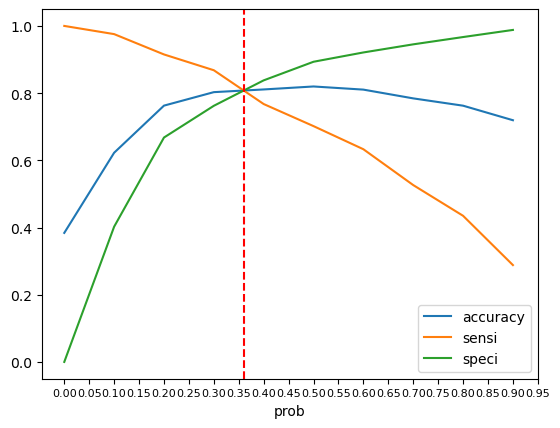

In [141]:

#plt.figure(figsize=(20,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.36, color='r', linestyle='--') # additing axline

plt.show()

As you can see that around `0.36`, you get the optimal values of the three metrics. So let's choose 0.36 as our cutoff now.

In [143]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Predict_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

Converted  Predict_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0      0.102425          0    1    1    0    0    0    0    0    0   
1          0      0.102425          0    1    1    0    0    0    0    0    0   
2          1      0.635430          1    1    1    1    1    1    1    1    0   
3          0      0.177753          0    1    1    0    0    0    0    0    0   
4          0      0.013231          0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_predicted  
0    0    0                0  
1    0    0                0  
2    0    0                1  
3    0    0                0  
4    0    0                0

### 7.3 Model Evaluation

In [145]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8074222668004012

In [146]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2917,  768],
       [ 384, 1913]])

In [147]:
# Let's evaluate the other metrics as well

TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [148]:
# Calculating the 'Sensitivity'

TP2/(TP2+FN2)

0.8328254244666957

In [149]:
# Calculating the 'Specificity'

TN2/(TN2+FP2)

0.7915875169606513

In [150]:
# Calculating the 'Precision'
TP2/(TP2+FP2)

0.7135397239835882

In [151]:
#Calculating the 'Recall'
TP2/(TP2+FN2)

0.8328254244666957

#### Observation: With this cutoff (0.36) for train data
- Accuracy : 80.7%
- Sensitivity: 83.3%
- Specificity: 79.2%
- Precision: 71.4%
- Recall: 83.3%.
  
This cutoff point seems good to go!

## 8. Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [155]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Predict_Prob, 
                                         drop_intermediate=False)

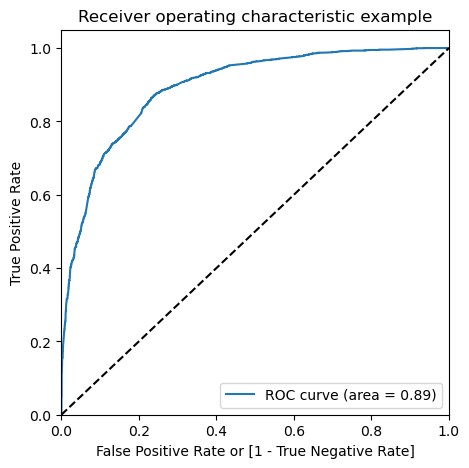

In [157]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Predict_Prob)

The area under the curve of the ROC is 0.89 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

### Precision and recall tradeoff

In [160]:
### Precision and recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Predict_Prob)

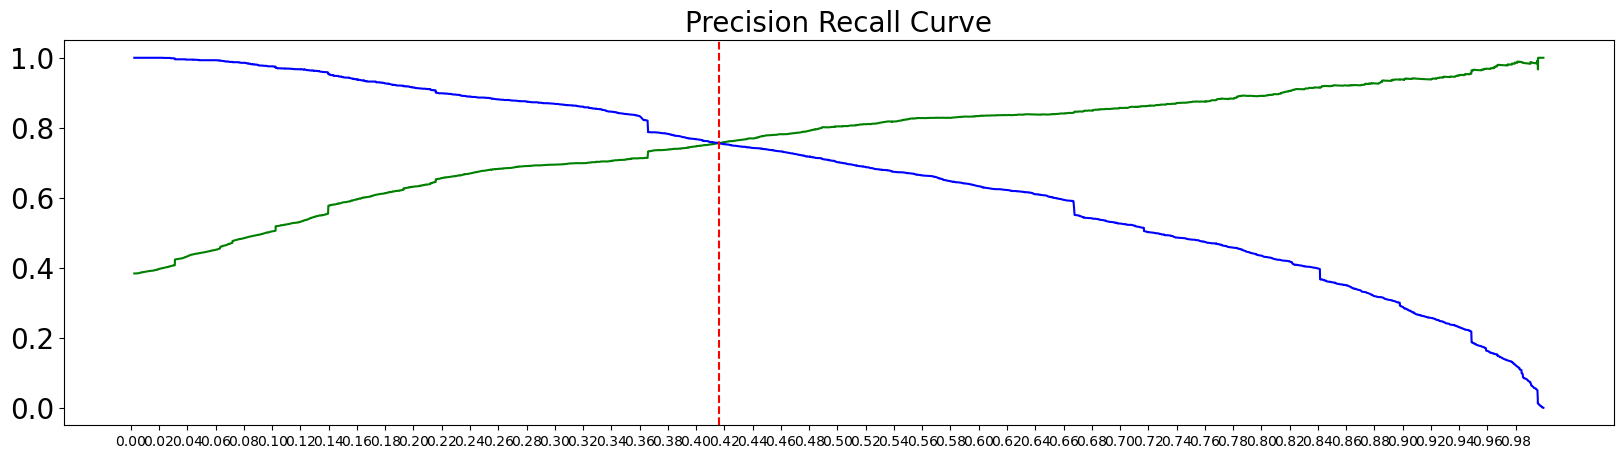

In [161]:
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "b-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.416, color='r', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

In [162]:
# plotting the Train dataset again with 0.416 as cutoff:-

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Predict_Prob'].map( lambda x: 1 if x > 0.416 else 0)
y_train_pred_final.head() # Displaying head 

Converted  Predict_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0      0.102425          0    1    1    0    0    0    0    0    0   
1          0      0.102425          0    1    1    0    0    0    0    0    0   
2          1      0.635430          1    1    1    1    1    1    1    1    0   
3          0      0.177753          0    1    1    0    0    0    0    0    0   
4          0      0.013231          0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_predicted  final_predicted_2  
0    0    0                0                  0  
1    0    0                0                  0  
2    0    0                1                  1  
3    0    0                0                  0  
4    0    0                0                  0

In [163]:
# Confusion matrix:-

confusion3= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion3)

[[3124  561]
 [ 561 1736]]


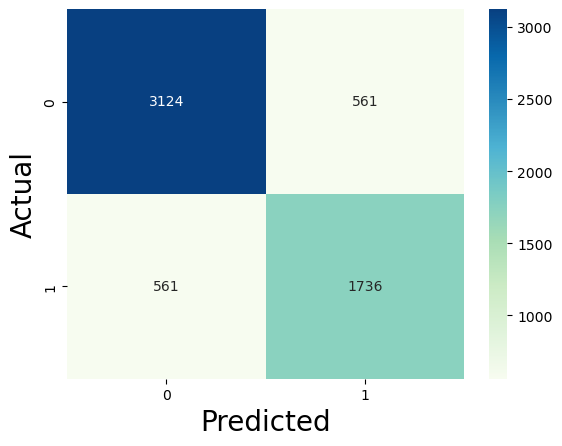

In [164]:
# Plotting confusion matrix:-
sns.heatmap(confusion3, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [165]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8124373119358074

In [166]:
TP3 = confusion3[1,1] # true positive 
TN3 = confusion3[0,0] # true negatives
FP3 = confusion3[0,1] # false positives
FN3 = confusion3[1,0] # false negatives

In [167]:
# Checking the sensitivity of our logistic regression model:-

TP3 /(TP3+FN3)

0.7557683935568132

In [168]:
# Calculating specificity:-

TN3 /(TN3+FP3)

0.8477611940298507

In [169]:
# positive predictive value :-

TP3 /(TP3+FP3)

0.7557683935568132

In [170]:
# Negative predictive value:

TN3 /(TN3+ FN3)

0.8477611940298507

In [171]:
# Precision:

TP3/(TP3+FP3)

0.7557683935568132

In [172]:
# 'Recall' 

TP3/(TP3+FN3)

0.7557683935568132

### Observation
By using the Precision - Recall trade off curve cut off point True Positive number has decrease and True Negative number has increase

Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive so 'Recall'/'sensitivity' decreased for this point We have to increase Sensitivity Recall value to increase True Positives. Thus we will use 0.36 as optimal cutoff point.

## 9. Making Predictions on the Test Set
Let's now make predicitons on the test set

In [175]:
# Re-check final columns from final model
final_col

Index(['Total Time Spent on Website', 'Lead Origin_landing page submission',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_other',
       'What is your current occupation_working professional',
       'Last Notable Activity_modified', 'Last Notable Activity_unreachable'],
      dtype='object')

In [176]:
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4380          9.0                           81                   4.5   
2059          3.0                         1157                   3.0   
2232          3.0                         1129                   3.0   
506           3.0                           23                   3.0   
833           0.0                            0                   0.0   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
4380                                    1                          0   
2059                                    1                          0   
2232                                    1                          0   
506                                     1                          0   
833                                     0                          0   

      Lead Origin_lead import  Lead Origin_quick add form  Lead Source_bing  \
4380                        0                           0                 0   
2059                        0                           0                 0   
2232                        0                           0                 0   
506                         0                           0                 0   
833                         0                           0                 0   

      Lead Source_blog  Lead Source_click2call  Lead Source_direct traffic  \
4380                 0                       0                           0   
2059                 0                       0                           0   
2232                 0                       0                           0   
506                  0                       0                           0   
833                  0                       0                           0   

      Lead Source_facebook  Lead Source_live chat  Lead Source_nc_edm  \
4380                     0                      0                   0   
2059                     0                      0                   0   
2232                     0                      0                   0   
506                      0                      0                   0   
833                      0                      0                   0   

      Lead Source_olark chat  Lead Source_organic search  \
4380                       0                           1   
2059                       0                           0   
2232                       0                           1   
506                        0                           1   
833                        1                           0   

      Lead Source_pay per click ads  Lead Source_reference  \
4380                              0                      0   
2059                              0                      0   
2232                              0                      0   
506                               0                      0   
833                               0                      0   

      Lead Source_referral sites  Lead Source_social media  \
4380                           0                         0   
2059                           0                         0   
2232                           0                         0   
506                            0                         0   
833                            0                         0   

      Lead Source_testone  Lead Source_welearn  Lead Source_welearnblog_home  \
4380                    0                    0                             0   
2059                    0                    0                             0   
2232                    0                    0                             0   
506                     0                    0                             0   
833                     0                    0                             0   

      Lead Source_welingak website  Lead Source_youtubechannel  \
4380                             0                           0   
2059                             0   

In [177]:
# Scaling the test set as well using just 'transform'
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] =  scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [178]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].describe()

TotalVisits  Page Views Per Visit  Total Time Spent on Website
count  2564.000000           2564.000000                  2564.000000
mean      0.017462             -0.014500                     0.003148
std       1.047243              0.992147                     1.003994
min      -1.074584             -1.301299                    -0.871224
25%      -1.074584             -1.301299                    -0.871224
50%      -0.319662              0.012755                    -0.441210
75%       0.435260              0.669782                     0.816282
max       5.342256              1.983836                     3.108008

In [179]:
# Selecting the columns in X_train for X_test as well
X_test = X_test[final_col]
X_test.head()

Total Time Spent on Website  Lead Origin_landing page submission  \
4380                    -0.722690                                    1   
2059                     1.250422                                    1   
2232                     1.199077                                    1   
506                     -0.829048                                    1   
833                     -0.871224                                    0   

      Lead Origin_lead add form  Lead Source_olark chat  \
4380                          0                       0   
2059                          0                       0   
2232                          0                       0   
506                           0                       0   
833                           0                       1   

      Lead Source_welingak website  Do Not Email_yes  \
4380                             0                 0   
2059                             0                 0   
2232                             0                 1   
506                              0                 0   
833                              0                 0   

      Last Activity_olark chat conversation  Last Activity_sms sent  \
4380                                      0                       0   
2059                                      0                       0   
2232                                      0                       0   
506                                       0                       0   
833                                       0                       1   

      What is your current occupation_other  \
4380                                      0   
2059                                      0   
2232                                      0   
506                                       1   
833                                       0   

      What is your current occupation_working professional  \
4380                                                     0   
2059                                                     0   
2232                                                     0   
506                                                      0   
833                                                      1   

      Last Notable Activity_modified  Last Notable Activity_unreachable  
4380                               0                                  0  
2059                               0                                  0  
2232                               1                                  0  
506                                0                                  0  
833                                1                                  0

In [180]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test[final_col])
# Checking X_test_sm
X_test_sm

const  Total Time Spent on Website  Lead Origin_landing page submission  \
4380    1.0                    -0.722690                                    1   
2059    1.0                     1.250422                                    1   
2232    1.0                     1.199077                                    1   
506     1.0                    -0.829048                                    1   
833     1.0                    -0.871224                                    0   
...     ...                          ...                                  ...   
4363    1.0                    -0.814378                                    1   
619     1.0                     1.846390                                    0   
1547    1.0                     0.109831                                    0   
8562    1.0                     2.013261                                    0   
4361    1.0                     0.106164                                    0   

      Lead Origin_lead add form  Lead Source_olark chat  \
4380                          0                       0   
2059                          0                       0   
2232                          0                       0   
506                           0                       0   
833                           0                       1   
...                         ...                     ...   
4363                          0                       0   
619                           0                       0   
1547                          0                       0   
8562                          0                       0   
4361                          0                       0   

      Lead Source_welingak website  Do Not Email_yes  \
4380                             0                 0   
2059                             0                 0   
2232                             0                 1   
506                              0                 0   
833                              0                 0   
...                            ...               ...   
4363                             0                 0   
619                              0                 0   
1547                             0                 0   
8562                             0                 0   
4361                             0                 0   

      Last Activity_olark chat conversation  Last Activity_sms sent  \
4380                                      0                       0   
2059                                      0                       0   
2232                                      0                       0   
506                                       0                       0   
833                                       0                       1   
...                                     ...                     ...   
4363                                      0                       0   
619                                       0                       0   
1547                                      1                       0   
8562                                      0                       0   
4361                                      0                       0   

      What is your current occupation_other  \
4380                                      0   
2059                                      0   
2232                                      0   
506                                       1   
833                                       0   
...                                     ...   
4363                                      0   
619                                       0   
1547                                      0   
8562                                      0   
4361                                      1   

      What is your current occupation_working professional  \
4380                                                     0   
2059                                                     0   
2232                                           

In [181]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4380    0.137540
2059    0.585550
2232    0.137215
506     0.038368
833     0.917520
2359    0.716844
2269    0.463570
3080    0.157406
2327    0.215710
6856    0.508108
dtype: float64

In [182]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4380  0.137540
2059  0.585550
2232  0.137215
506   0.038368
833   0.917520

In [183]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [184]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [185]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted         0
0          0  0.137540
1          0  0.585550
2          0  0.137215
3          0  0.038368
4          1  0.917520

In [186]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Predict_Prob'})
y_pred_final.head()

Converted  Predict_Prob
0          0      0.137540
1          0      0.585550
2          0      0.137215
3          0      0.038368
4          1      0.917520

In [187]:
#Assigning 'Lead Score' to dataframe 'y_pred_final':-

y_pred_final['Lead_Score'] = y_pred_final.Predict_Prob.map( lambda x: round(x*100))


In [188]:
# Make predictions on the test set using 0.37 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Predict_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final.head()

Converted  Predict_Prob  Lead_Score  final_predicted
0          0      0.137540          14                0
1          0      0.585550          59                1
2          0      0.137215          14                0
3          0      0.038368           4                0
4          1      0.917520          92                1

### Test model evaluation

In [190]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8100624024960998

In [191]:
# Confusion matrix
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1226,  338],
       [ 149,  851]])

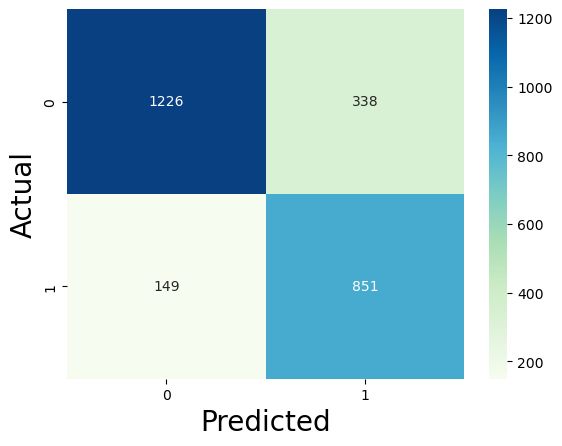

In [192]:
# Plotting confusion matrix:-
sns.heatmap(confusion4, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [193]:
TP4 = confusion4[1,1] # true positive 
TN4 = confusion4[0,0] # true negatives
FP4 = confusion4[0,1] # false positives
FN4 = confusion4[1,0] # false negatives

In [194]:
# Calculating the 'sensitivity'
TP4 / (TP4+FN4)

0.851

In [195]:
# Calculating the 'specificity'
TN4 / (TN4+FP4)

0.7838874680306905

In [196]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

FP4/ (TN4+FP4)

0.21611253196930946

In [197]:
# positive predictive value :-

TP4 / (TP4+FP4)

0.7157275021026073

In [198]:
# Negative predictive value:-

TN4 / (TN4+FN4)

0.8916363636363637

###  Precision-Recall

In [200]:
# Calculating 'precision_score':-

precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7157275021026073

In [201]:
#Calculating 'recall_score':-

recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.851

### Observation

The sensitivity value for test data is 85.1% while for train data is also 83.3% . The accuracy values is ~ 81% Which shows that model is performing well for test data set also.

### Determining top feature based on final model (Model4)

In [204]:
# Displaying parameters obtained by final model 'Model4' res=logm4:

pd.options.display.float_format = '{:.2f}'.format # Setting format option
res.params[1:]

Total Time Spent on Website                             1.11
Lead Origin_landing page submission                    -0.31
Lead Origin_lead add form                               3.36
Lead Source_olark chat                                  1.14
Lead Source_welingak website                            2.51
Do Not Email_yes                                       -1.39
Last Activity_olark chat conversation                  -0.88
Last Activity_sms sent                                  1.25
What is your current occupation_other                  -1.27
What is your current occupation_working professional    2.45
Last Notable Activity_modified                         -0.74
Last Notable Activity_unreachable                       2.56
dtype: float64

In [205]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = res.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Total Time Spent on Website                             32.88
Lead Origin_landing page submission                     -9.11
Lead Origin_lead add form                              100.00
Lead Source_olark chat                                  33.99
Lead Source_welingak website                            74.65
Do Not Email_yes                                       -41.26
Last Activity_olark chat conversation                  -26.16
Last Activity_sms sent                                  37.05
What is your current occupation_other                  -37.71
What is your current occupation_working professional    72.98
Last Notable Activity_modified                         -22.00
Last Notable Activity_unreachable                       76.10
dtype: float64

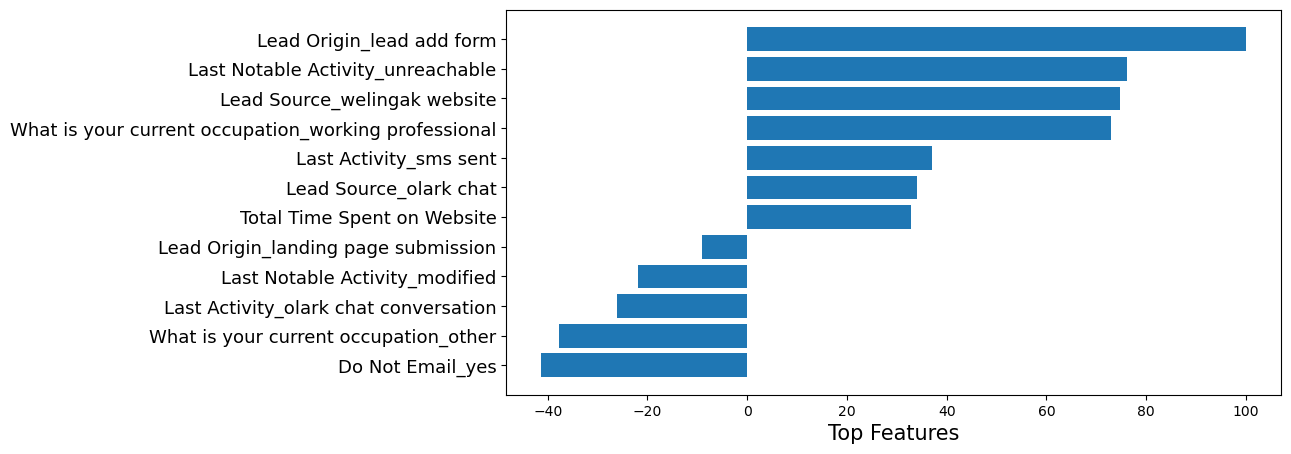

In [206]:
# Plotting the feature variables based on their relative importance:-

top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

### Final model line equation :-

**** Converted = -0.7307 + 1.11*'Total Time Spent on Website' -0.31*'Lead Origin_landing page submission' +3.36*'Lead Origin_lead add form' +1.14*'Lead Source_olark chat' + 2.51*'Lead Source_welingak website' -1.39*'Do Not Email_yes' -0.88*'Last Activity_olark chat conversation' +1.25*'Last Activity_sms sent' -1.27*'What is your current occupation_other' + 2.45*'What is your current occupation_working professional' -0.74*'Last Notable Activity_modified' + 2.56*'Last Notable Activity_unreachable'  ****

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1. Lead Origin: Lead add form
   Leads who have engaged through 'Lead Add Form' having higher conversion rate so company can focus on it to get more number of leads cause have a higher chances of getting converted.
   
2. Last Notable Activity: Unreachable
   It's also strange that if last notable activity is unreachle, it has a higher chances to convert leads.
   
3. Lead source: welinkak website :
   As conversion rate is higher for those leads who got to know about course from 'Welingak Website',so company can focus on this website to get more number of potential leads.
   
4. What is your current occupation: working professional
   The lead whose occupation is 'Working Professional' having higher lead conversion rate ,company should focus on working professionals nad try to get more number of leads.
   
5. Last Activity: SMS Sent
   Lead whose last activity is sms sent can be potential lead for company.
   
6. Lead srouce: Olark chat
   As conversion rate is higher for those leads who got to know about course from 'Olark chat',so company can focus on this website to get more number of potential leads.
   
7. Total time spent on website
    Leads spending more time on website can be our potential lead.
   
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.